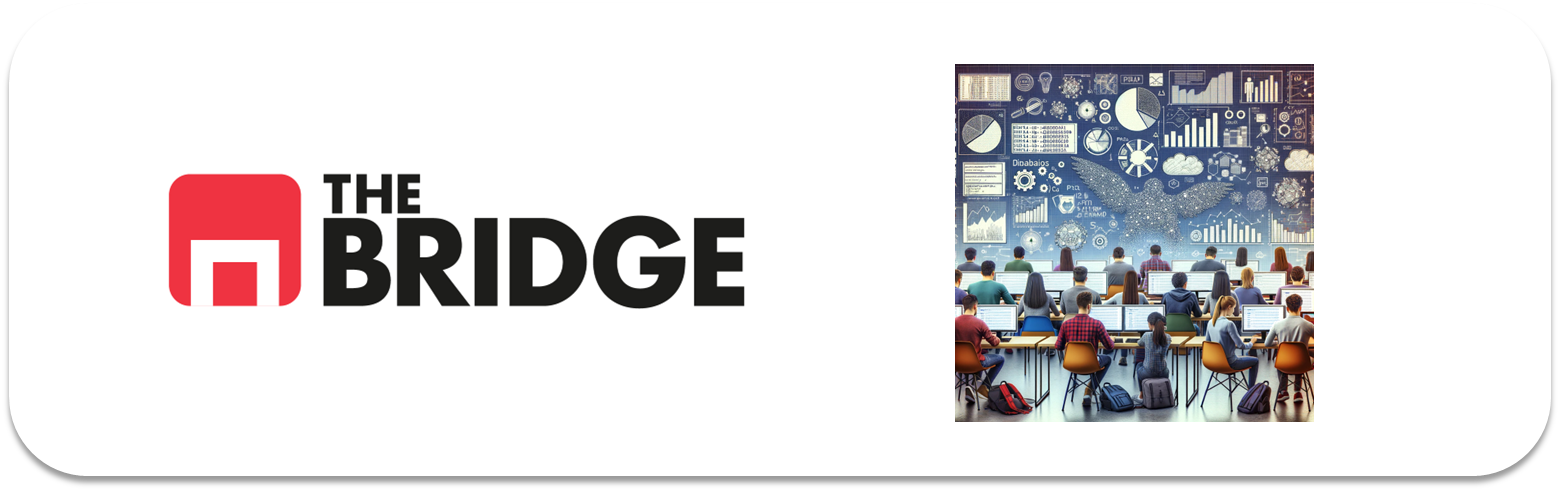

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [55]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [40]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep= "|")

In [41]:
target = "MEDV"
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


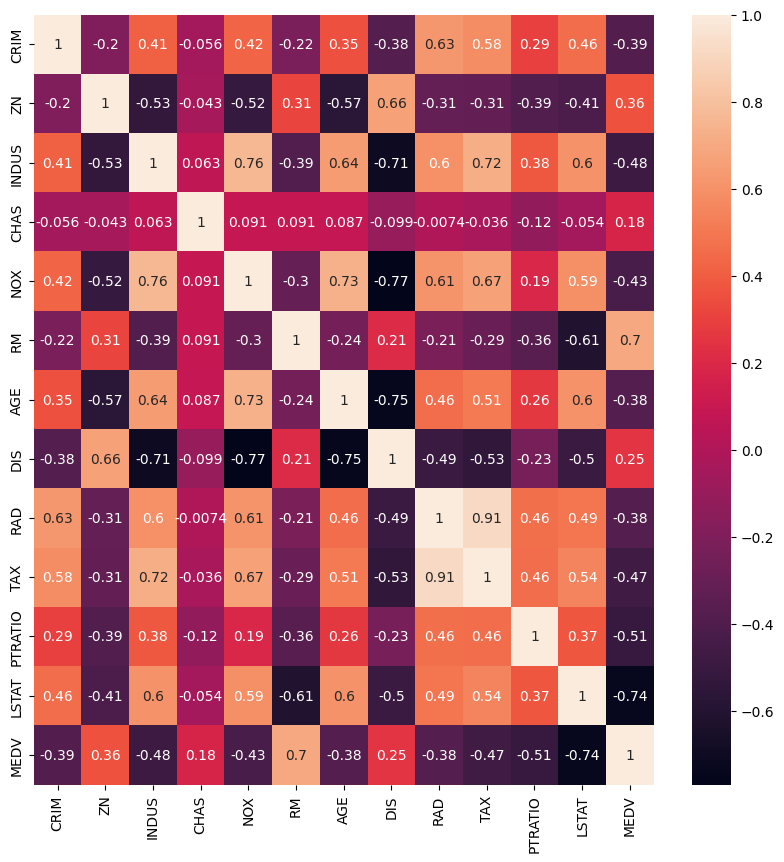

In [42]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();

In [43]:
from sklearn.model_selection import train_test_split
x = df[["LSTAT","RM", "PTRATIO", "INDUS","RAD","CRIM","AGE","ZN"]]
y = df[["MEDV"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 8)
(102, 8)
(404, 1)
(102, 1)


array([[<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'CRIM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: >]], dtype=object)

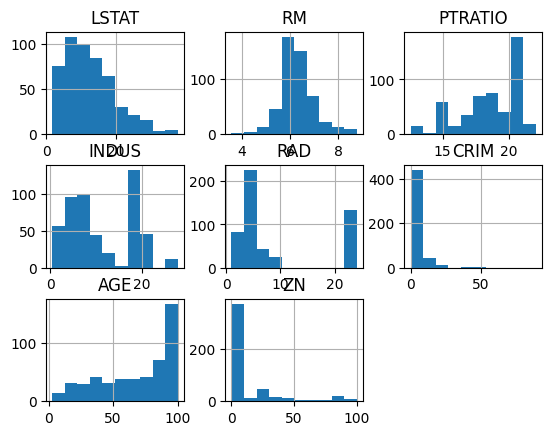

In [45]:
x.hist()

In [46]:
#cambiar = ["ZN","CRIM","RAD"]

#for col in cambiar:
    #X_train[f"log_{col}"] = X_train[col].apply(np.log)
   
"""Intente hacer logaritmos de las columnas comentadas pero me daba un error que no supe resolver, espero verlo en clase"""


array([[<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'CRIM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: >]], dtype=object)

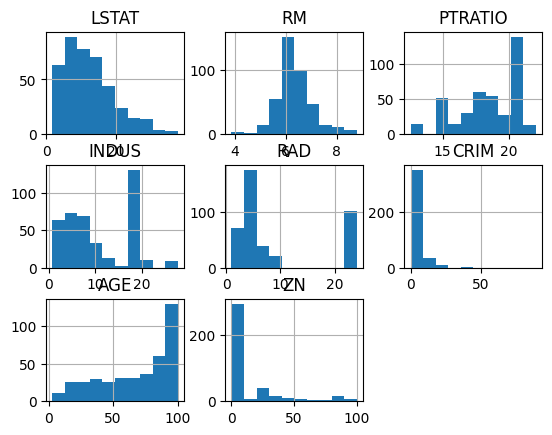

In [47]:
X_train.hist()

In [48]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [49]:
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
lm.coef_

array([[-0.58272362,  4.82803853, -0.90903284, -0.01930044,  0.04453302,
        -0.10804959,  0.01505035, -0.01655897]])

In [54]:
coef_df = pd.DataFrame(lm.coef_.T, X_test.columns, columns=['Coefficient'])
coef_df

,Coefficient
LSTAT,-0.582724
RM,4.828039
PTRATIO,-0.909033
INDUS,-0.019300
RAD,0.044533
CRIM,-0.108050
AGE,0.015050
ZN,-0.016559


Estos numeros no tienen sentido no se que hice mal

In [58]:
predictions = lm.predict(X_test)
predictions

array([[27.57864601],
       [30.01240913],
       [16.76246755],
       [24.24837539],
       [19.08654579],
       [22.98586084],
       [17.90975105],
       [13.15053916],
       [21.41930996],
       [20.10957529],
       [20.29485782],
       [21.90330764],
       [-5.25263309],
       [22.23515771],
       [19.62741785],
       [25.33685328],
       [17.36182313],
       [ 3.59050808],
       [38.08409826],
       [17.69049702],
       [24.83409564],
       [26.53253988],
       [12.19782305],
       [23.51352325],
       [18.44034171],
       [14.11292995],
       [22.13442176],
       [19.88497114],
       [18.70389076],
       [18.97695634],
       [20.27249735],
       [25.4209753 ],
       [24.7467071 ],
       [18.91679519],
       [15.41987298],
       [21.65368882],
       [32.58893717],
       [20.63762879],
       [20.23442337],
       [23.90502989],
       [12.95637747],
       [28.2884451 ],
       [38.3380766 ],
       [18.15207514],
       [26.23936366],
       [16

In [56]:
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 3.632858145923468
MSE train 26.386904294265523
RMSE train 5.136818499252774
R2 train 0.696260269195818


In [59]:
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 3.4290911806254116
MSE test 28.438620073852146
RMSE test 5.332787270635511
R2 test 0.612203014104981


In [72]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.4)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE  sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE : %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 26.39
Test MSE  sin regularización: 28.44
Train MSE : 26.8810
Test MSE: 27.2154


Probe varios valores pero este es el que mas acerca el resultado de train y test

Tengo muchos errores en el codigo que tengo que corregir pero me quedaria con el modelo regularizado sin dudas ya que hace que generalice mejor.